In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sed_fitter import FitSED

In [3]:
bands = ['Su', 'Sg', 'Sr', 'Si', 'Sz']

fitsed = FitSED(atm_type = 'H', bands = bands)

initialized with atm_type = H and bands = ['Su', 'Sg', 'Sr', 'Si', 'Sz']


Let's simulate a mock SED to fit, with T = 15000 K, logg = 8:

In [4]:
sigma = 0.005

observed_sed = fitsed.model_sed(teff = 15000, logg = 8, plx = 100, to_flux = False)# Generate absolute magnitudes
observed_sed += sigma * observed_sed * np.random.normal(size = len(observed_sed))
e_observed_sed = sigma * observed_sed

Text(0.5, 0, 'Passband')

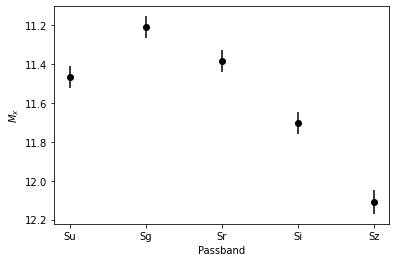

In [5]:
plt.errorbar(bands, observed_sed, yerr = e_observed_sed, color = 'k', linestyle = 'none', marker = 'o')
plt.gca().invert_yaxis()
plt.ylabel('$M_x$')
plt.xlabel('Passband')

Now we recover the atmospheric parameters using the SED fitter and nested sampling:

[1.49872719e+04 8.00556881e+00 9.97767341e+01]


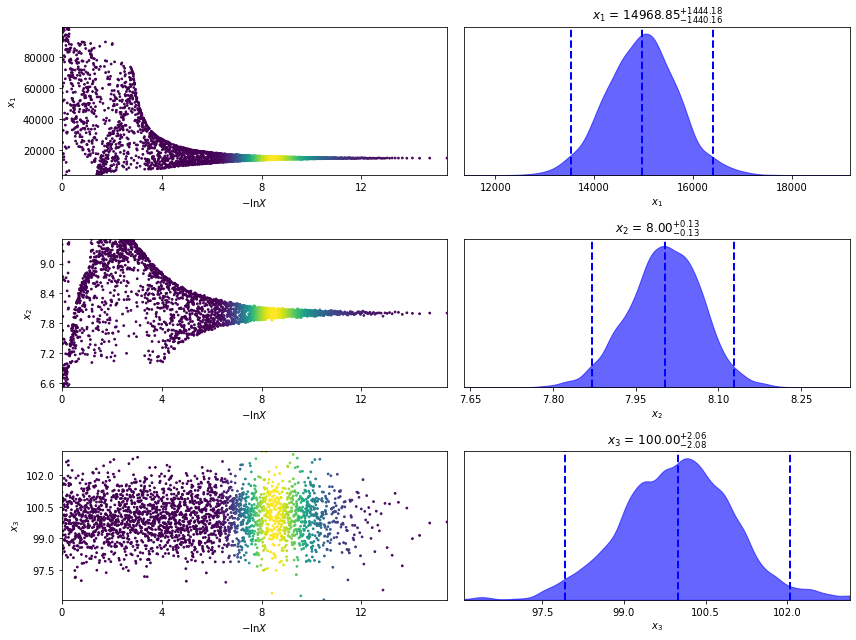

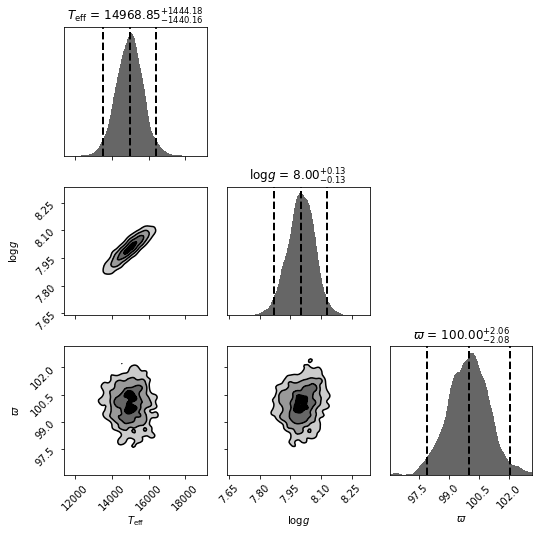

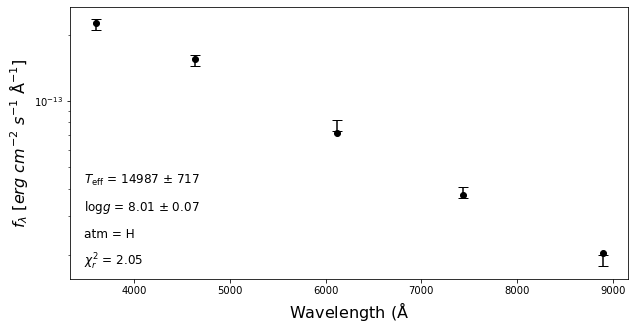

In [6]:
result = fitsed.fit(sed = observed_sed, e_sed = e_observed_sed, parallax = (100, 1), 
                    plot_fit = True, plot_trace = True, plot_corner = True)